##  The Poisson Distribution

In [20]:
% pylab inline
from __future__ import division
import seaborn as sns

from IPython.display import Math
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


###  How many pieces of mail do you receive daily?

Let's say you usually get 10 letters a day.. 

We can use the Poisson Equation to look at the Probability Mass Function

In [2]:
from IPython.display import display, Math, Latex
display(Math(r'P(Y|\lambda)  = (\lambda^ye^{-\lambda})/y!'));

display(Math(r'E(Y)=\lambda'));
display(Math(r'Var(Y)=\lambda'));

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3]:
sum=0
pois=[]
def our_poisson(y,lam):
    p=(lam**y)*np.exp(-lam)/(math.factorial(y))
    return p

for x in range(50):
    pois.append(our_poisson(x,10))

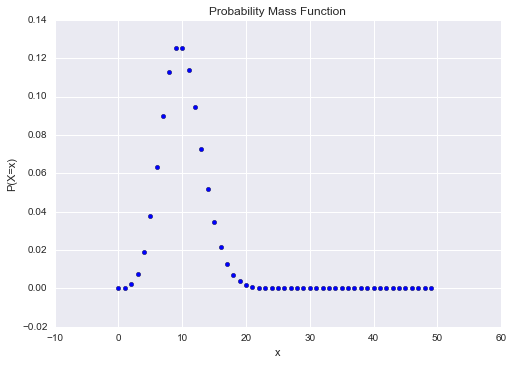

In [4]:
plt.scatter(xrange(50),pois)
plt.title("Probability Mass Function")
plt.ylabel("P(X=x)")
plt.xlabel("x")

#### The poisson distribution applies when:   
    - The event is something that can be counted in whole numbers   
    - Occurences are independent, (one occurence can not affect the chances of a previous or subsequent occurence)   
    - Average frequency of occurence for the time period in question is known.   
    - It is possible to count have many events have occurred ( How many firealarms went off in the building today)   
    
#### More examples:   
    # of births per hour in a hospital   
    # of cars passing by Madison Ave in some time interval  
    # of goals in a hockey game
    # Soldiers in the Prussian calvary killed by horse kicks

## Poisson Distribution:

In [4]:
from IPython.display import display, Math, Latex
display(Math(r'P(Y|\lambda)  = (\lambda^ye^{-\lambda})/y!'));

display(Math(r'E(Y)=\lambda'));
display(Math(r'Var(Y)=\lambda'));

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
sample=np.random.poisson(4, 1000)
print sample.mean()
print sample.var()

4.006
4.079964


In [8]:
# A REAL Example: 'Turn Around Time' for a Nose Landing Gear Tire (Delivery) was 9.25 days

# As follows: is the (average) # of tires each station would require within 9.25
dets=[['JFK',16],['FLL',7],['EWR',5],['LGB',4],['MCO',4]]
data=pd.DataFrame(dets,columns=['STA','Lambda'])
data.head()

,STA,Lambda
0,JFK,16
1,FLL,7
2,EWR,5
3,LGB,4
4,MCO,4


In [7]:
# 
sum=0
for i in range(len(data)):
    sum=0
    for j in range(40):
        sum+=our_poisson(j,int(data.Lambda[i]))
        if sum > 0.985:
            print data.STA[i]
            print j
            print sum
            print '\n'
            break

JFK
25
0.986881437112


FLL
13
0.987188607197


EWR
10
0.986304731402


LGB
9
0.991867757203


MCO
9
0.991867757203




### Poisson Regression Example

In [17]:
import statsmodels.api as sm
from patsy import dmatrices

In [14]:
url='http://quantedu.com/wp-content/uploads/2014/05/job.txt'
data=pd.read_csv(url,delimiter=r"\s+")

In [13]:
Y,X = dmatrices('Job ~ Income + GPA', data=data, return_type='dataframe')
X.head()

,Intercept,Income,GPA
0,1.0,39.693,2.53
1,1.0,45.250,1.99
2,1.0,45.688,3.83
3,1.0,46.927,1.99
4,1.0,47.436,3.21


In [18]:
# Data 
pois_m=sm.GLM(Y,X, family=sm.families.Poisson(sm.families.links.log))
# Fitting our model using Maximum likelihood
pois_results=pois_m.fit()

print pois_results.summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    Job   No. Observations:                  200
Model:                            GLM   Df Residuals:                      197
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -200.44
Date:                Thu, 28 Jul 2016   Deviance:                       199.93
Time:                        06:15:44   Pearson chi2:                     221.
No. Iterations:                     8                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.9318      0.661     -8.970      0.000        -7.228    -4.636
Income         0.0777      0.008     10.339      0.0